# **Plot 3 GeoPandas - Map**



## Hypothèse 2

Notre hypothèse de recherche est la suivante : « Certains aéroports new-yorkais sont plus touchés par les retards. ».

### Rôle de l'Hypothèse

Cette hypothèse est fondamentale car elle guide le choix de nos variables, de nos outils de visualisation, et l'interprétation de nos résultats.

- Variables Clés : Pour tester cette hypothèse, nous avons concentré notre analyse sur la variable catégorielle origin (aéroport de départ : JFK, LGA, EWR) et sur la variable numérique arr_delay (retard à l'arrivée).

- Objectif de l'Analyse : L'objectif est de comparer la moyenne et la distribution des retards (arr_delay) entre les trois groupes définis par la variable origin.

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/nycflights.csv')
# touts arrive meme avance
df_arrive = df.dropna(subset='arr_delay')
comptes_Tout = df_arrive['origin'].value_counts()


df_touts_retards = df_arrive[df_arrive['arr_delay'] > 0] # plus 0 tojour retard
comptes_Tout_retard = df_touts_retards['origin'].value_counts()


df_retard_grave = df_arrive[df_arrive['arr_delay'] > 30] # retard grave plus 30 min
comptes_grave_30 = df_retard_grave['origin'].value_counts()

In [86]:
# list de aeroport par gemini
coords = {
    'ABQ': {'lat': 35.0402, 'lon': -106.6091}, 'ACK': {'lat': 41.2528, 'lon': -70.0602},
    'ALB': {'lat': 42.7482, 'lon': -73.8016},  'ANC': {'lat': 61.1743, 'lon': -149.9963},
    'ATL': {'lat': 33.6407, 'lon': -84.4277},  'AUS': {'lat': 30.1975, 'lon': -97.6664},
    'AVL': {'lat': 35.4362, 'lon': -82.5418},  'BDL': {'lat': 41.9389, 'lon': -72.6832},
    'BGR': {'lat': 44.8074, 'lon': -68.8281},  'BHM': {'lat': 33.5629, 'lon': -86.7535},
    'BNA': {'lat': 36.1245, 'lon': -86.6782},  'BOS': {'lat': 42.3656, 'lon': -71.0096},
    'BQN': {'lat': 18.4949, 'lon': -67.1294},  'BTV': {'lat': 44.4730, 'lon': -73.1503},
    'BUF': {'lat': 42.9405, 'lon': -78.7321},  'BUR': {'lat': 34.2006, 'lon': -118.3585},
    'BWI': {'lat': 39.1754, 'lon': -76.6682},  'BZN': {'lat': 45.7769, 'lon': -111.1530},
    'CAE': {'lat': 33.9388, 'lon': -81.1195},  'CAK': {'lat': 40.9161, 'lon': -81.4422},
    'CHO': {'lat': 38.1386, 'lon': -78.4529},  'CHS': {'lat': 32.8986, 'lon': -80.0405},
    'CLE': {'lat': 41.4109, 'lon': -81.8494},  'CLT': {'lat': 35.2140, 'lon': -80.9431},
    'CMH': {'lat': 39.9980, 'lon': -82.8919},  'CRW': {'lat': 38.3731, 'lon': -81.5932},
    'CVG': {'lat': 39.0461, 'lon': -84.6621},  'DAY': {'lat': 39.9024, 'lon': -84.2194},
    'DCA': {'lat': 38.8512, 'lon': -77.0402},  'DEN': {'lat': 39.8561, 'lon': -104.6737},
    'DFW': {'lat': 32.8998, 'lon': -97.0403},  'DSM': {'lat': 41.5340, 'lon': -93.6631},
    'DTW': {'lat': 42.2121, 'lon': -83.3533},  'EGE': {'lat': 39.6426, 'lon': -106.9177},
    'EYW': {'lat': 24.5561, 'lon': -81.7596},  'FLL': {'lat': 26.0726, 'lon': -80.1527},
    'GRR': {'lat': 42.8808, 'lon': -85.5227},  'GSO': {'lat': 36.1044, 'lon': -79.9350},
    'GSP': {'lat': 34.8956, 'lon': -82.2189},  'HDN': {'lat': 40.4812, 'lon': -107.2177},
    'HNL': {'lat': 21.3187, 'lon': -157.9225}, 'HOU': {'lat': 29.6454, 'lon': -95.2789},
    'IAD': {'lat': 38.9445, 'lon': -77.4558},  'IAH': {'lat': 29.9805, 'lon': -95.3397},
    'ILM': {'lat': 34.2706, 'lon': -77.9026},  'IND': {'lat': 39.7173, 'lon': -86.2944},
    'JAC': {'lat': 43.6073, 'lon': -110.7377}, 'JAX': {'lat': 30.4941, 'lon': -81.6879},
    'JFK': {'lat': 40.6413, 'lon': -73.7781},  'LAS': {'lat': 36.0840, 'lon': -115.1537},
    'LAX': {'lat': 33.9416, 'lon': -118.4085}, 'LGB': {'lat': 33.8177, 'lon': -118.1516},
    'LGA': {'lat': 40.7769, 'lon': -73.8740},  'EWR': {'lat': 40.6895, 'lon': -74.1745},
    'MCI': {'lat': 39.2976, 'lon': -94.7139},  'MCO': {'lat': 28.4289, 'lon': -81.3160},
    'MDW': {'lat': 41.7868, 'lon': -87.7522},  'MEM': {'lat': 35.0424, 'lon': -89.9767},
    'MHT': {'lat': 42.9345, 'lon': -71.4371},  'MIA': {'lat': 25.7932, 'lon': -80.2906},
    'MKE': {'lat': 42.9472, 'lon': -87.8966},  'MSN': {'lat': 43.1399, 'lon': -89.3375},
    'MSP': {'lat': 44.8805, 'lon': -93.2169},  'MSY': {'lat': 29.9934, 'lon': -90.2580},
    'MTJ': {'lat': 38.5089, 'lon': -107.8938}, 'MVY': {'lat': 41.3930, 'lon': -70.6143},
    'MYR': {'lat': 33.6797, 'lon': -78.9283},  'OAK': {'lat': 37.7213, 'lon': -122.2207},
    'OKC': {'lat': 35.3931, 'lon': -97.6007},  'OMA': {'lat': 41.3025, 'lon': -95.8942},
    'ORD': {'lat': 41.9742, 'lon': -87.9073},  'ORF': {'lat': 36.8946, 'lon': -76.2012},
    'PBI': {'lat': 26.6832, 'lon': -80.0956},  'PDX': {'lat': 45.5887, 'lon': -122.5975},
    'PHL': {'lat': 39.8719, 'lon': -75.2411},  'PHX': {'lat': 33.4342, 'lon': -112.0116},
    'PIT': {'lat': 40.4915, 'lon': -80.2329},  'PSE': {'lat': 18.0083, 'lon': -66.5630},
    'PSP': {'lat': 33.8297, 'lon': -116.5067}, 'PVD': {'lat': 41.7240, 'lon': -71.4282},
    'PWM': {'lat': 43.6462, 'lon': -70.3088},  'RDU': {'lat': 35.8776, 'lon': -78.7875},
    'RIC': {'lat': 37.5052, 'lon': -77.3197},  'ROC': {'lat': 43.1189, 'lon': -77.6724},
    'RSW': {'lat': 26.5362, 'lon': -81.7552},  'SAN': {'lat': 32.7336, 'lon': -117.1897},
    'SAT': {'lat': 29.5337, 'lon': -98.4698},  'SAV': {'lat': 32.1276, 'lon': -81.2021},
    'SDF': {'lat': 38.1744, 'lon': -85.7360},  'SEA': {'lat': 47.4489, 'lon': -122.3093},
    'SFO': {'lat': 37.6190, 'lon': -122.3748}, 'SJC': {'lat': 37.3619, 'lon': -121.9290},
    'SJU': {'lat': 18.4394, 'lon': -66.0018},  'SLC': {'lat': 40.7884, 'lon': -111.9778},
    'SMF': {'lat': 38.6954, 'lon': -121.5908}, 'SNA': {'lat': 33.6757, 'lon': -117.8674},
    'SRQ': {'lat': 27.3953, 'lon': -82.5531},  'STL': {'lat': 38.7477, 'lon': -90.3596},
    'STT': {'lat': 18.3373, 'lon': -64.9733},  'SYR': {'lat': 43.1112, 'lon': -76.1063},
    'TPA': {'lat': 27.9755, 'lon': -82.5332},  'TUL': {'lat': 36.1984, 'lon': -95.8882},
    'TVC': {'lat': 44.7414, 'lon': -85.5822},  'TYS': {'lat': 35.8125, 'lon': -83.9929},
    'XNA': {'lat': 36.2819, 'lon': -94.3068}
}
len(coords)

105

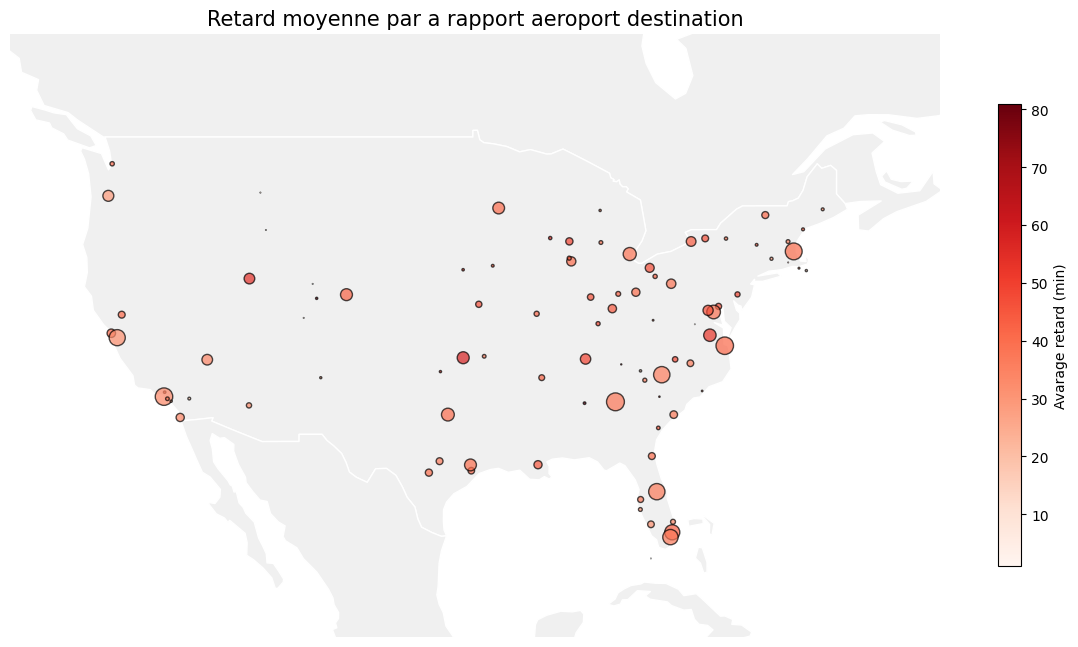

<Figure size 640x480 with 0 Axes>

In [87]:

geo_data = table_comparasion.copy()

geo_data['lat'] = geo_data.index.map(lambda x: coords[x]['lat'] if x in coords else None)
geo_data['lon'] = geo_data.index.map(lambda x: coords[x]['lon'] if x in coords else None)

#nettoyage si manquede des donne
geo_data = geo_data.dropna(subset=['lat', 'lon'])
# 3. GeoDataFrame
gdf = gpd.GeoDataFrame(
    geo_data,
    geometry=gpd.points_from_xy(geo_data.lon, geo_data.lat),
    crs="EPSG:4326" # coordinant system
)
#utilser de url pour carte
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

#afficher continent
north_america = world[world['CONTINENT'] == 'North America']

# 5. figure
fig, ax = plt.subplots(figsize=(15, 12))

# carte plan
north_america.plot(ax=ax, color='#f0f0f0', edgecolor='white')

# bubbles
gdf.plot(
    ax=ax,
    column='Avarage Retard',
    cmap='Reds',
    legend=True,
    markersize=geo_data['T_Arrivées'] / 10,
    alpha=0.7,
    edgecolor='black',
    legend_kwds={'label': "Avarage retard (min)", 'shrink':0.5}
)

ax.set_xlim(-130, -60)
ax.set_ylim(20, 55)
plt.title('Retard moyenne par a rapport aeroport destination', fontsize=15)
plt.axis('off')
plt.show()
plt.savefig('serdar_varol_geo_plot3_1.png')

**Un autre point de vue selon la disctance**

Ici on utilser des autre varible pour observer des rasion des retard. *origin* ,  *arr_delay* et *dest*

In [88]:
import pandas as pd

# 1. Fonction de préparation du tableau
def preparer_table(code_aeroport, donnees_principales, liste_coordonnees):
    # selection uniqment selon origin "jfk etc"
    donnees = donnees_principales[donnees_principales['origin'] == code_aeroport].copy()

    # grorper par destination et calcule avarage et nbr
    table_stat = donnees.groupby('dest')['arr_delay'].agg(['mean', 'count']).reset_index()

    # Renommer les colonnes pour l'affichage (En Français)
    table_stat.columns = ['Destination', 'Retard Moyen', 'Nombre de Vols']

    # Mapper les coordonnées (Latitude/Longitude) depuis votre dictionnaire 'coords'
    # Si la destination n'est pas dans la liste, cela retourne NaN
    table_stat['lat'] = table_stat['Destination'].map(lambda x: liste_coordonnees[x]['lat'] if x in liste_coordonnees else None)
    table_stat['lon'] = table_stat['Destination'].map(lambda x: liste_coordonnees[x]['lon'] if x in liste_coordonnees else None)

    # Supprimer les destinations sans coordonnées pour éviter les erreurs de carte
    table_stat = table_stat.dropna(subset=['lat', 'lon'])

    # Trier par nombre de vols décroissant (les plus fréquents en premier)
    return table_stat.sort_values(by='Nombre de Vols', ascending=False)

# 2. Création des trois tableaux distincts
# Nous utilisons 'df_touts_retards' (vos données filtrées) et 'coords' (votre liste de coordonnées)

df_JFK = preparer_table('JFK', df_touts_retards, coords)
df_LGA = preparer_table('LGA', df_touts_retards, coords)
df_EWR = preparer_table('EWR', df_touts_retards, coords)

# 3. Vérification des résultats (Affichage des 5 premières lignes)
print(f"--- Tableau JFK ({len(df_JFK)} Destinations) ---")
print(df_JFK.head())
print("\n" + "="*50 + "\n")

print(f"--- Tableau LGA ({len(df_LGA)} Destinations) ---")
print(df_LGA.head())
print("\n" + "="*50 + "\n")

print(f"--- Tableau EWR ({len(df_EWR)} Destinations) ---")
print(df_EWR.head())

--- Tableau JFK (66 Destinations) ---
   Destination  Retard Moyen  Nombre de Vols      lat       lon
29         LAX     33.887500             400  33.9416 -118.4085
57         SFO     41.492013             313  37.6190 -122.3748
32         MCO     34.275556             225  28.4289  -81.3160
5          BOS     43.070423             213  42.3656  -71.0096
21         FLL     44.900524             191  26.0726  -80.1527


--- Tableau LGA (64 Destinations) ---
   Destination  Retard Moyen  Nombre de Vols      lat      lon
0          ATL     37.713656             454  33.6407 -84.4277
45         ORD     40.261017             295  41.9742 -87.9073
13         CLT     33.184615             260  35.2140 -80.9431
39         MIA     34.835106             188  25.7932 -80.2906
18         DCA     30.430108             186  38.8512 -77.0402


--- Tableau EWR (82 Destinations) ---
   Destination  Retard Moyen  Nombre de Vols      lat       lon
2          ATL     41.276265             257  33.6407  -

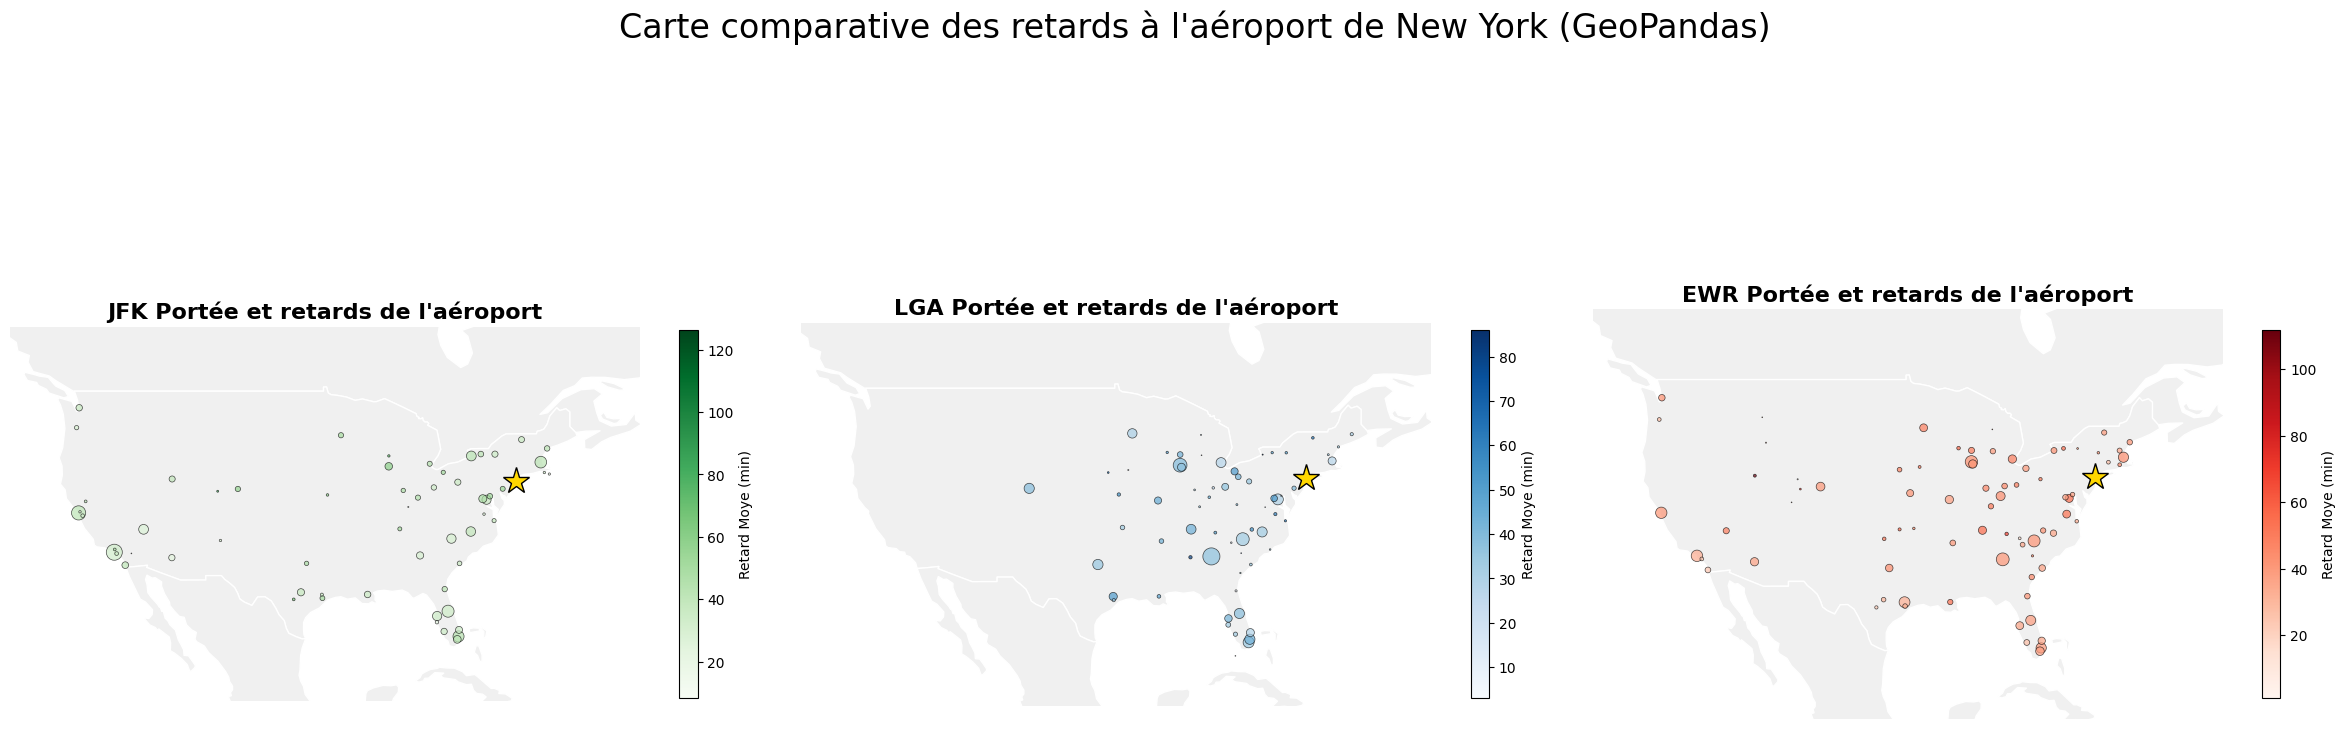

<Figure size 640x480 with 0 Axes>

In [89]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Geodata Frame
def make_gdf(df):
    return gpd.GeoDataFrame(
        df,
        geometry=gpd.points_from_xy(df.lon, df.lat),
        crs="EPSG:4326"
    )

# de table à data frame
gdf_JFK = make_gdf(df_JFK)
gdf_LGA = make_gdf(df_LGA)
gdf_EWR = make_gdf(df_EWR)

# 2. telecharge carte sur internet
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
north_america = world[world['CONTINENT'] == 'North America']

# figure
fig, axes = plt.subplots(1, 3, figsize=(24, 10)) #

# 3 diffrent carte
plot_configs = [
    (axes[0], gdf_JFK, 'JFK', 'Greens', (-73.78, 40.64)), # JFK: Vert
    (axes[1], gdf_LGA, 'LGA', 'Blues',  (-73.87, 40.77)), # LGA:bleu
    (axes[2], gdf_EWR, 'EWR', 'Reds',   (-74.17, 40.69))  # EWR: rouge
]

for ax, gdf, name, cmap, origin_coords in plot_configs:
    # A. arrier
    north_america.plot(ax=ax, color='#f0f0f0', edgecolor='white')

    # B. destiantion
    gdf.plot(
        ax=ax,
        column='Retard Moyen', # color: temp delay
        cmap=cmap,               # chauque aeroppr orgin
        legend=True,
        # taille de babbul
        markersize=gdf['Nombre de Vols'] / 3,
        alpha=0.7,
        edgecolor='black',
        linewidth=0.5,
        legend_kwds={'label': 'Retard Moye (min)', 'shrink': 0.4}
    )

    # C. origin etoile
    ax.plot(origin_coords[0], origin_coords[1], marker='*', color='gold', markersize=20, markeredgecolor='black', label='Kalkış')

    # D.
    ax.set_title(f"{name} Portée et retards de l'aéroport", fontsize=16, fontweight='bold')
    ax.set_xlim(-130, -60) # America nort
    ax.set_ylim(20, 55)
    ax.axis('off')

# Ortak Başlık
plt.suptitle("Carte comparative des retards à l'aéroport de New York (GeoPandas)", fontsize=24, y=0.98)
plt.tight_layout()
plt.show()
plt.savefig('serdar_varol_geo_plot3_2.png')